In [165]:
# importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
# provided data

data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
        'Age': [25, 30, 35, 40, 45],
        'Gender': ['Female', 'Male', 'Male', 'Male', 'Female'],
        'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami'],
        'Salary': [60000, 70000, 80000, 90000, 100000]}

In [167]:
#  putting data into DataFrame

df = pd.DataFrame(data)
print(df)

      Name  Age  Gender         City  Salary
0    Alice   25  Female     New York   60000
1      Bob   30    Male  Los Angeles   70000
2  Charlie   35    Male      Chicago   80000
3    David   40    Male      Houston   90000
4      Eva   45  Female        Miami  100000


In [168]:
#  Summarizing the main characteristics of the dataset using describe()

print(df.describe())

             Age         Salary
count   5.000000       5.000000
mean   35.000000   80000.000000
std     7.905694   15811.388301
min    25.000000   60000.000000
25%    30.000000   70000.000000
50%    35.000000   80000.000000
75%    40.000000   90000.000000
max    45.000000  100000.000000


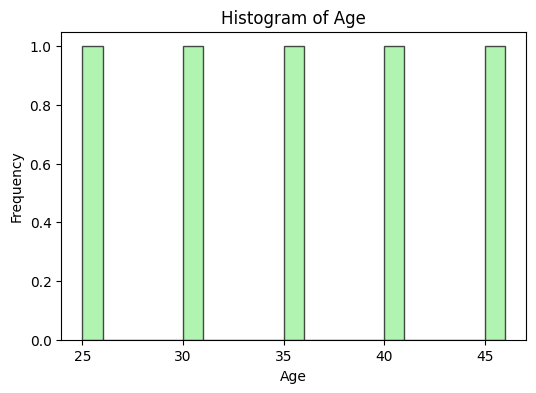

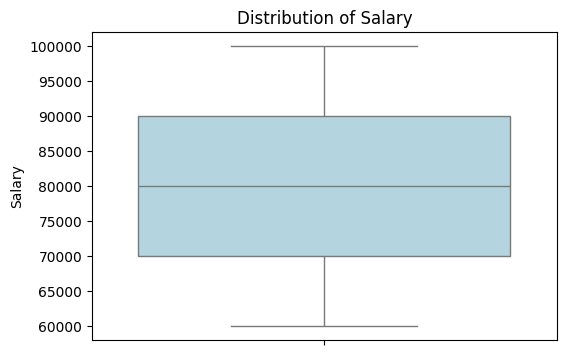

In [169]:
#  Visualizing distributions of numerical variables using histogram and box plot

plt.figure(figsize = (6, 4)) # creating a histogram for age column with matplotlib
plt.hist(df['Age'], bins = range(df['Age'].min(),df['Age'].max() + 2, 1), alpha=0.7, color = 'lightgreen', edgecolor = 'black') # converting age values to int, formatting
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

print() # blank row

plt.figure(figsize = (6, 4)) # visualising salary distribution with seaborn boxplot
sns.boxplot(data = df, y = 'Salary', color = 'lightblue')
plt.ylabel('Salary')
plt.title('Distribution of Salary')
plt.show()

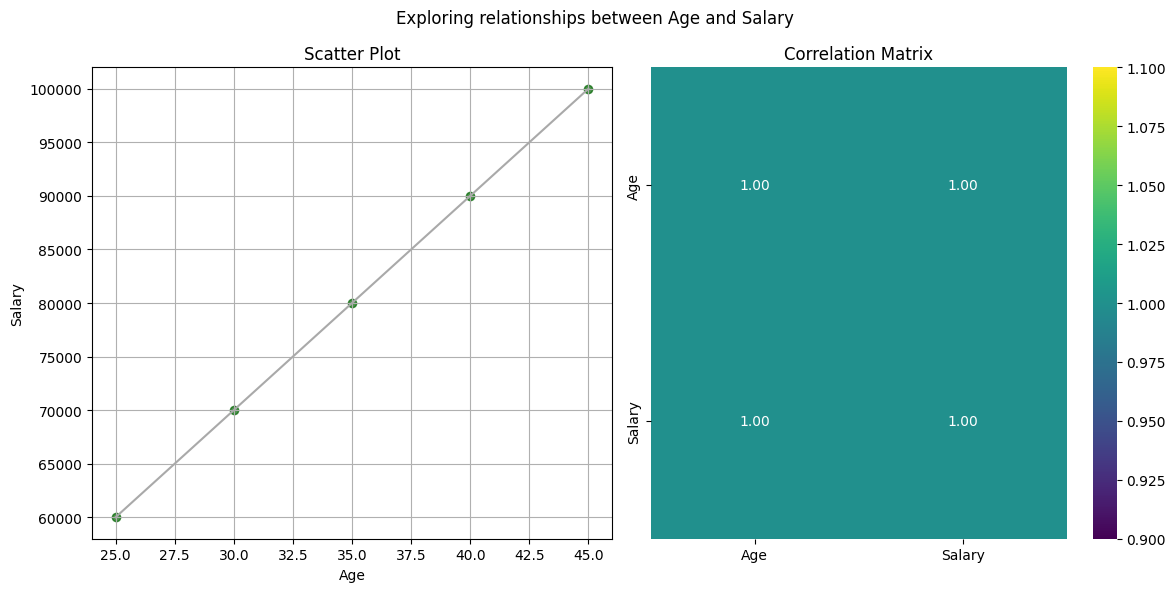

In [170]:
# Exploring relationships between variables using scatter plots or correlation matrices

fig, axes = plt.subplots(1, 2, figsize = (12, 6)) # adding subplots to show the figures next to each other

axes[0].scatter(df['Age'], df['Salary'], color = 'darkgreen', alpha = 0.7)
axes[0].set_title('Scatter Plot')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Salary')
axes[0].grid(True)

x_value = df['Age']
y_value = df['Salary']
coefficients = np.polyfit(x_value, y_value, 1) # adding a regression line on the scatter plot
poly_eq = np.poly1d(coefficients)
axes[0].plot(x_value, poly_eq(x_value), color = 'darkgrey')

correlation_matrix = df[['Age', 'Salary']].corr() # adding a correlation matrix
sns.heatmap(correlation_matrix, annot = True, cmap = 'viridis', fmt = ".2f", ax = axes[1])
axes[1].set_title('Correlation Matrix')

fig.suptitle('Exploring relationships between Age and Salary', fontsize = 12)
plt.tight_layout() # adjusting layout
plt.show()

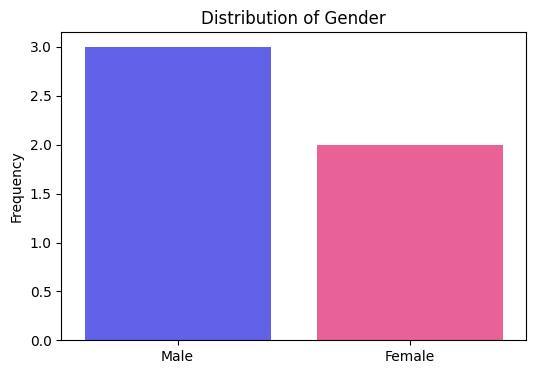

Frequency Table of Gender:
Male      3
Female    2


In [171]:
# Analyzing categorical variables using bar plots or frequency tables

plt.figure(figsize=(6, 4))
sns.barplot(
    x = df['Gender'].value_counts().index,
    y = df['Gender'].value_counts(),
    hue = df['Gender'].value_counts().index,
    palette = {'Male': 'blue', 'Female': (1.0, 0.0, 0.4, 1.0)}, alpha = 0.7)
plt.title('Distribution of Gender')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

gender_frequency = df['Gender'].value_counts() # creating a frequency table
gender_frequency.index.name = None # removing gender index name
print("Frequency Table of Gender:")
print(gender_frequency.to_string()) # removing system message

Let's use z-score method to find outliers in the dataset.



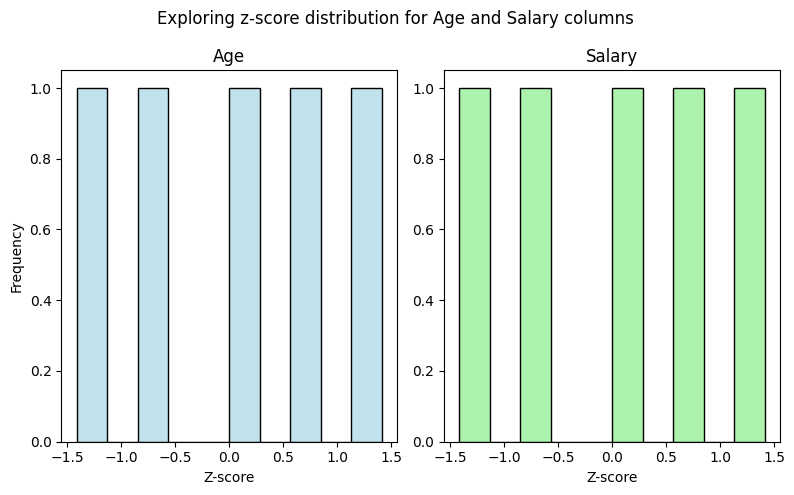

From the looks of z-score value distribution for both Age and Salary column, we can make a conclusion that there are no
outliers in our data, as the threshold value doesn't even get to a value of 2.0


In [172]:
# Detecting outliers and missing values

print("Let's use z-score method to find outliers in the dataset.")
print()

fig, axes = plt.subplots(1, 2, figsize = (8, 5)) # adding subplots to show the z-score distributions next to each other

from scipy import stats # importing stats library to calculate z-score
import textwrap # importing text wrapping module

# calculating z-scores for the 'Age' and 'Salary' attributes
age_z_score = stats.zscore(df['Age'])
salary_z_score = stats.zscore(df['Salary'])

sns.histplot(data = age_z_score, bins = 10, color = 'lightblue', ax = axes[0]) # plotting a histogram of z-score values for Age column
axes[0].set_title('Age')
axes[0].set_xlabel('Z-score')
axes[0].set_ylabel('Frequency')

sns.histplot(data = salary_z_score, bins = 10, color = 'lightgreen', ax = axes[1]) # plotting a histogram of z-score values for Salary column
axes[1].set_title('Salary')
axes[1].set_xlabel('Z-score')
axes[1].set_ylabel('')

fig.suptitle('Exploring z-score distribution for Age and Salary columns', fontsize = 12)
plt.tight_layout() # adjusting layout
plt.show()

print(textwrap.fill(("From the looks of z-score value distribution for both Age and Salary column, we can make a conclusion that there are no outliers in our data, as the threshold value doesn't even get to a value of 2.0"), width = 120))

In [173]:
# Calculating summary statistics such as mean, median, and standard deviation

mean_value = df.drop(columns = ['Name', 'Gender', 'City']).mean() # calculating mean excluding non numerical values
median_value = df.drop(columns = ['Name', 'Gender', 'City']).median() # calculating median excluding non numerical values
std_dev_value = df.drop(columns = ['Name', 'Gender', 'City']).std().round(2) # calculating standard deviation values excluding non numerical values

from tabulate import tabulate # importing library to show as a table

table = [
    ['Mean', *mean_value],
    ['Median', *median_value],
    ['Standard Deviation', *std_dev_value]]

print(tabulate(table, headers = ['Statistic', 'Age', 'Salary'], tablefmt = 'plain')) # printing table

Statistic             Age    Salary
Mean                35      80000
Median              35      80000
Standard Deviation   7.91   15811.4
